In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_NW_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,NaN,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,NaN,1.64,0.0
212,NaN,14.38,0.00,NaN,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	10
float64		column 2	21
float64		column 3	0
float64		column 4	21
float64		column 5	5
float64		column 6	15
float64		column 7	5
float64		column 8	15
float64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,204.000000,193.000000,214.000000,193.000000,209.000000,199.000000,209.000000,199.000000,214.000000
mean,1.518258,13.417617,2.684533,1.473161,72.650861,0.484724,8.965263,0.158291,0.057009
std,0.002750,0.811724,1.442408,0.480142,0.774586,0.532792,1.435955,0.482354,0.097439
min,1.511310,10.730000,0.000000,0.340000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516528,12.930000,2.115000,1.210000,72.280000,0.140000,8.240000,0.000000,0.000000
50%,1.517670,13.310000,3.480000,1.400000,72.790000,0.560000,8.610000,0.000000,0.000000
75%,1.519120,13.830000,3.600000,1.640000,73.080000,0.610000,9.180000,0.000000,0.100000
max,1.531250,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

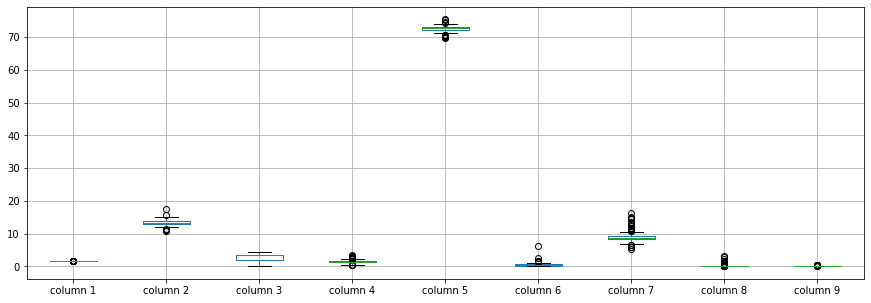

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518258
column 2    13.417617
column 3     2.684533
column 4     1.473161
column 5    72.650861
column 6     0.484724
column 7     8.965263
column 8     0.158291
column 9     0.057009
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.180796,-0.121588,-0.391781,-0.437109,-0.279635,0.790072,0.027289,0.120393
column 2,-0.180796,1.000000,-0.231573,0.147396,-0.050542,-0.272231,-0.286070,0.240889,-0.248465
column 3,-0.121588,-0.231573,1.000000,-0.510688,-0.151881,0.105740,-0.459287,-0.447178,0.083060
column 4,-0.391781,0.147396,-0.510688,1.000000,-0.125384,0.249663,-0.202517,0.464185,-0.074057
column 5,-0.437109,-0.050542,-0.151881,-0.125384,1.000000,-0.138684,-0.215085,-0.145488,-0.094345
column 6,-0.279635,-0.272231,0.105740,0.249663,-0.138684,1.000000,-0.323913,0.003295,0.009671
column 7,0.790072,-0.286070,-0.459287,-0.202517,-0.215085,-0.323913,1.000000,-0.106722,0.117944
column 8,0.027289,0.240889,-0.447178,0.464185,-0.145488,0.003295,-0.106722,1.000000,-0.047145
column 9,0.120393,-0.248465,0.083060,-0.074057,-0.094345,0.009671,0.117944,-0.047145,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+26,9+26+26,9+26+26+26,9+26+26+26+26,9+26+26+26+26+26,9+26+26+26+26,9+26+26+26,9+26+26,9+26,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 98.87843146690956
Epoch: 1 , loss: 98.82141465407152
Epoch: 2 , loss: 98.87597949688251
Epoch: 3 , loss: 98.85842954195462
Epoch: 4 , loss: 98.79703932542067
Epoch: 5 , loss: 98.82898183969351
Epoch: 6 , loss: 99.09318014291617
Epoch: 7 , loss: 99.1236795278696
Epoch: 8 , loss: 98.73560274564304
Epoch: 9 , loss: 98.82101088303786
Epoch: 10 , loss: 98.74295043945312
Epoch: 11 , loss: 98.69891474797176
Epoch: 12 , loss: 98.74117279052734
Epoch: 13 , loss: 98.76928124060997
Epoch: 14 , loss: 98.68979996901292
Epoch: 15 , loss: 98.76761333759015
Epoch: 16 , loss: 98.7434815626878
Epoch: 17 , loss: 98.72254356971153
Epoch: 18 , loss: 98.791139455942
Epoch: 19 , loss: 98.63486598088191
Epoch: 20 , loss: 98.76431685227614
Epoch: 21 , loss: 98.69419684776894
Epoch: 22 , loss: 98.70961820162259
Epoch: 23 , loss: 98.73811751145583
Epoch: 24 , loss: 99.09006617619441
Epoch: 25 , loss: 98.77726510854868
Epoch: 26 ,

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.519660
column 2    14.770000
column 3     3.750000
column 4     0.050444
column 5    72.020000
column 6     0.030000
column 7     9.000000
column 8     0.000000
column 9     0.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.000000,0.0,0.0,0.00000,0.0,-0.001003,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0
210,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0
211,0.000000,0.0,0.0,0.00000,0.0,0.000000,-8.396109,0.0,0.0
212,-1.485397,0.0,0.0,-1.90862,0.0,0.000000,0.000000,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(174.75597112750145, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.16026247673231478

In [18]:
new_df.iloc[66,:]

column 1     1.521520
column 2    13.050000
column 3     3.650000
column 4     0.053669
column 5    72.220000
column 6     0.190000
column 7     9.850000
column 8     0.000000
column 9     0.170000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.521010,13.64,4.49,1.10000,71.78,0.058997,8.750000,0.00,0.0
1,1.517610,13.89,3.60,1.36000,72.73,0.480000,7.830000,0.00,0.0
2,1.516180,13.53,3.55,1.54000,72.99,0.390000,7.780000,0.00,0.0
3,1.517660,13.21,3.69,1.29000,72.61,0.570000,8.220000,0.00,0.0
4,1.517420,13.27,3.62,1.24000,73.08,0.550000,8.070000,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.516230,14.14,0.00,2.88000,72.61,0.080000,9.180000,1.06,0.0
210,1.516850,14.92,0.00,1.99000,73.06,0.000000,8.400000,1.59,0.0
211,1.520650,14.36,0.00,2.02000,73.42,0.000000,0.043891,1.64,0.0
212,0.031113,14.38,0.00,0.03138,73.61,0.000000,8.480000,1.57,0.0


In [21]:
imputations[-1].to_excel("Glass_NW_5(imp).xlsx", index=False, header=False)